<a href="https://colab.research.google.com/github/aniekh/personal_learning/blob/main/learninggoal3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning goal 3: Random Forest regression 




### Original learning goal:

"*I want to learn how to perform statistical analyses on large volumes of data. Currently I have some basic knowledge on how to perform statistical analyses, but have never structurally applied this to large volumes of data. At the end of this course I want to know relevant techniques for analysing data. Therefore I will produce a working Python Jupyter notebook with a procedure that demonstrates a commonly used way to perform statistical analyses on large volumes of data in a structural way.*"

# Introduction
Instead of looking at multiple statistical analyses I have decided to look into only one. I wanted to learn more on machine learning, especially on the random forest algorithm. In the course we have worked on classification with the help of decision trees and random forests, however as a environmental scientist a regression analyises using the random forest algorithm would be more exciting for me. I would see this as a usefull tool in e.g. weather data, to identify outliers and predict future temperatures and explore other interesting parameters. In this notebook I will be using KNMI weather data from the year 2021 to train an algorithm to predict the average temperature of a day using the temperatures from previous days. 

We start by importing relevant packages and getting the data. 



In [ ]:
#run only when geopandas is not yet installed
!pip install geopandas


In [ ]:
# Load all importance packages
import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns
import pydot
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz



In [ ]:
weather_data = pd.read_csv('/content/weather_data.csv', delimiter=';')
weather_data.head()


,YYYYMMDD,year,month,day,mean,mean_2,mean_1,min_2,min_1,max_2,max_1,hist
0,20210101,2021,1,1,3.0,3.7,4.2,2.5,2.4,5.8,6.8,4.47
1,20210102,2021,1,2,3.6,4.2,3.0,2.4,-3.5,6.8,5.7,4.93
2,20210103,2021,1,3,3.3,3.0,3.6,-3.5,3.1,5.7,4.5,5.23
3,20210104,2021,1,4,2.8,3.6,3.3,3.1,2.8,4.5,4.0,4.99
4,20210105,2021,1,5,2.9,3.3,2.8,2.8,2.3,4.0,3.6,4.47


The data describes the following things:
* year: 2021 for all data points
* month: number for month of the year
* day: number for day of the month
* mean: actual mean temperature
* mean_2: mean temperature 2 days prior
* mean_1: mean temperature 1 day prior
* min_2: min temperature 2 days prior
* min_1: min temperature 1 day prior
* max_2: max temperature 2 days prior
* max_1: max temperature 1 day prior
* hist: historical average temperatue on that day over the previous 10 years

First lets check if the table is complete, the table should contain 365 days.

In [ ]:
weather_data.shape

(365, 12)

luckely, it does! Lets check if there are any weird values before we move on.

In [ ]:
weather_data.describe()

,YYYYMMDD,year,month,day,mean,mean_2,mean_1,min_2,min_1,max_2,max_1,hist
count,3.650000e+02,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.021067e+07,2021.0,6.526027,15.720548,10.481096,10.432329,10.457534,6.173151,6.193699,14.335342,14.357534,10.785342
std,3.454755e+02,0.0,3.452584,8.808321,6.109086,6.125554,6.116698,5.785435,5.785672,6.961242,6.946853,5.353682
min,2.021010e+07,2021.0,1.000000,1.000000,-5.800000,-5.800000,-5.800000,-10.900000,-10.900000,-4.800000,-4.800000,1.500000
25%,2.021040e+07,2021.0,4.000000,8.000000,5.700000,5.600000,5.700000,1.900000,1.900000,9.200000,9.200000,5.670000
50%,2.021070e+07,2021.0,7.000000,16.000000,10.300000,10.200000,10.200000,6.300000,6.300000,14.100000,14.100000,10.540000
75%,2.021100e+07,2021.0,10.000000,23.000000,16.300000,16.300000,16.300000,11.000000,11.000000,20.300000,20.300000,16.060000
max,2.021123e+07,2021.0,12.000000,31.000000,24.000000,24.000000,24.000000,18.800000,18.800000,30.800000,30.800000,20.200000


Nothing seems off, but lets try one last step: lets plot the mean temperatures real quick and see if there is anything wrong there. 

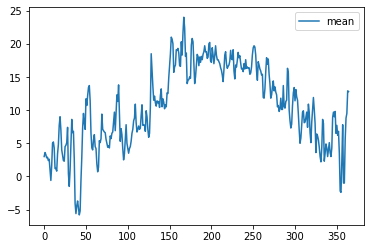

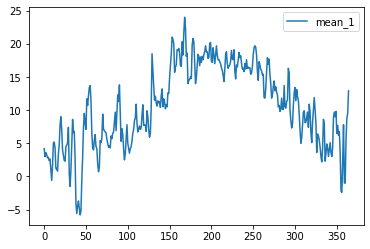

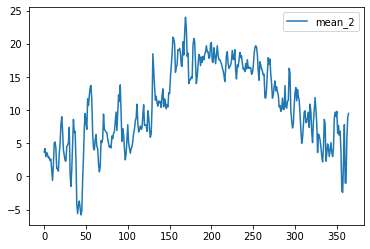

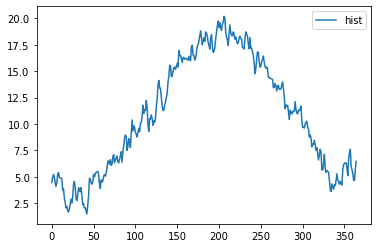

In [ ]:
weather_data.plot(y='mean')
weather_data.plot(y='mean_1')
weather_data.plot(y='mean_2')
weather_data.plot(y='hist')

Everything seems normal, we can now feel confident in the quality of our data. Let's get on with the real work!

First we need to take the mean temperature data out of our dataframe, because this is what we want to predict. 

In [ ]:
# Labels are the values we want to predict, so the mean temperature of that day
labels = np.array(weather_data['mean'])

# Remove the labels from the original dataframe
weather_data = weather_data.drop('mean', axis = 1)

# Saving feature names for later use, to check the importances of each parameter
weather_data_list = list(weather_data.columns)

# Convert the dataframe to a numpy array
weather_data = np.array(weather_data)

Okay now we have to split our data into training and testing sets and make the actual model. We'll make a model using 1000 decision trees.  

In [ ]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(weather_data, labels, test_size = 0.25, random_state = 42)


In [ ]:
# Lets make a model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

Lets check the accuracy of our model. First we'll calculate the mean absolute error and then use this to find the accuracy

In [ ]:
predictions = rf.predict(test_features)

errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.53 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 78.32 %.


So our model has an accuracy of a little under 80 percent. Not bad, for a first try! So now we can sort of predict the weather based on the weather of the previous days. Of course the model is far from perfect, we'll need to use more data and tweek the paramters of the model to improve it, but thats for another time. For now lets check what the model actually uses to make decisions. 

In [ ]:
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = weather_data_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

Now that is a pretty big tree if I say so myself! To make things a little bit easier we can limit the depth of trees to produce and understandable image. 

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = weather_data_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

This looks much more like it, now we can see how the model makes it decisions and how it comes to a conclusion. 

We can also quantify the usefulness of all the variables in the forest. Let's check it out!

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(weather_data_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]; 

Variable: mean_1               Importance: 0.77
Variable: hist                 Importance: 0.09
Variable: max_1                Importance: 0.05
Variable: min_1                Importance: 0.03
Variable: YYYYMMDD             Importance: 0.01
Variable: day                  Importance: 0.01
Variable: mean_2               Importance: 0.01
Variable: min_2                Importance: 0.01
Variable: max_2                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: month                Importance: 0.0


The mean temperature from the previous day is the most important, which is a rather intuitive finding. If yesterday was nice, chances are that it is going to be nice today as well. Following is the historical average of the previous ten years, also not that surprising. The year is the same for the whole dataset, so ofcourse there is no conclusions to be made based on that. We could use these values to upgrade the model for further uses, but for now lets move on to a bit of visualisation. 

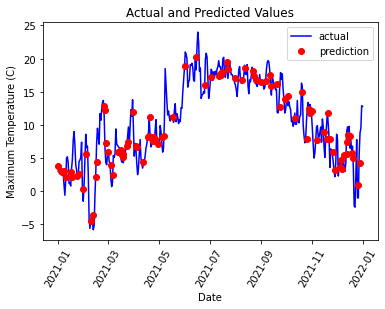

In [ ]:
# Dates of training values
months = weather_data[:, weather_data_list.index('month')]
days = weather_data[:, weather_data_list.index('day')]
years = weather_data[:, weather_data_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, weather_data_list.index('month')]
days = test_features[:, weather_data_list.index('day')]
years = test_features[:, weather_data_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (C)'); plt.title('Actual and Predicted Values');

See how our predicted values seem to be pretty close to the actual values, no really obvious outliers are visibile in the graph. Pretty good for a first try!


##Note on the ethical question of using algorithms. 
This notebook was designed soley for practising with the Random Forest Algorithm, however researchers always have to be carefull when working with algorithms. Start by critically assing your dataset and your mining techniques, and identify the biases that are in there.  Additionally, to prevent as much bias as possible from your data, think of providing alternative computing techniques to mine the same datasets. Also, be critical of the abilities of your algorithm and misinterpretation of data (e.g. sentiment analysis). When working with algorithms in serious project make sure to provide alternative interpretation of the same patterns, e.g. through human interpretation. And lastly, think about who is at fault when something goes wrong when using an algorithm: the makers, the implementors, the users? Provide tracability within your process. 
Concluding, when you are using algorithms within a project always be critical of the ethical and practical side of it. Make sure that there is a clear workflow throughout the project to be able to identify problems and biases as the researcher, but also for users. 




###*For now this concludes this Jupyter Notebook. We've discussed and practiced with using the random forest algorithm for a regression analysis.* 

####Sources
- https://www.knmi.nl/nederland-nu/klimatologie/daggegevens 
- https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 